# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [40]:
df=pd.read_csv("song_data.csv")

In [3]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Preprocessing


In [41]:
df=df.drop("song_name",axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [7]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [42]:
df["song_duration_ms"]=round(df["song_duration_ms"]/60000,2)
df=df.rename({"song_duration_ms":"song_duration_min"},axis=1)

In [43]:
df["acousticness"]=round(df["acousticness"],4)
df["energy"]=round(df["energy"],4)
df["instrumentalness"]=round(df["instrumentalness"],4)
df["liveness"]=round(df["liveness"],3)
df["loudness"]=round(df["loudness"],2)
df["speechiness"]=round(df["speechiness"],3)
df["tempo"]=round(df["tempo"],2)
df["audio_valence"]=round(df["audio_valence"],2)

array([[<AxesSubplot:title={'center':'song_popularity'}>,
        <AxesSubplot:title={'center':'song_duration_min'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'audio_mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'audio_valence'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

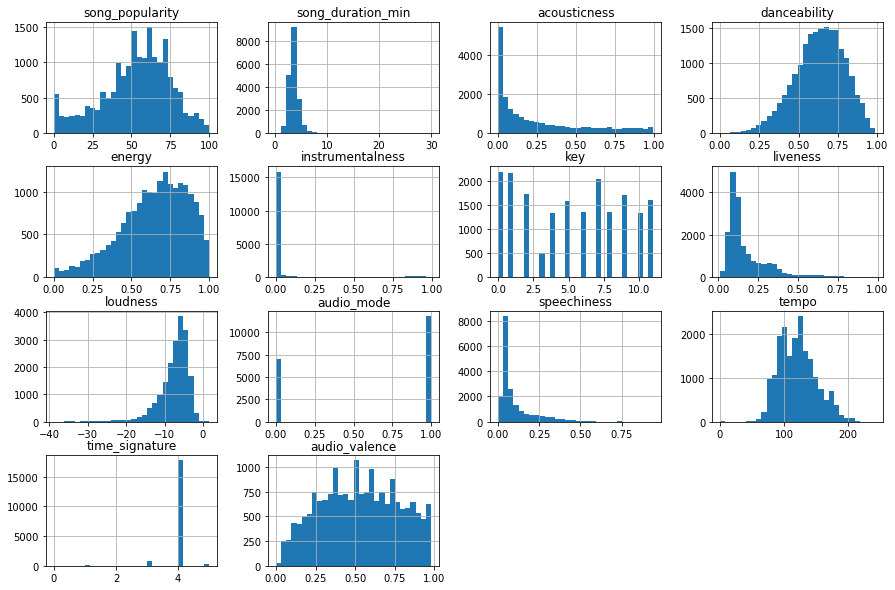

In [31]:
df.hist(bins=30, figsize=(15, 10))

<AxesSubplot:>

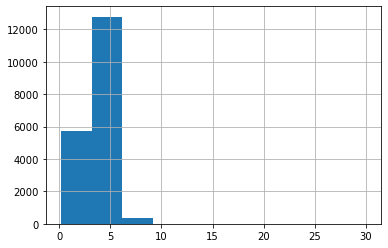

In [33]:
df["song_duration_min"].hist()

In [44]:
df=df[df["song_duration_min"]<10]

<AxesSubplot:>

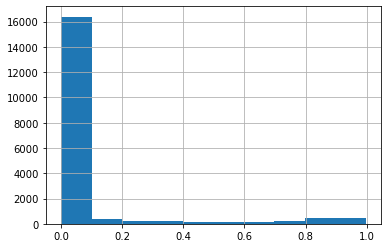

In [36]:
df["instrumentalness"].hist()

<AxesSubplot:>

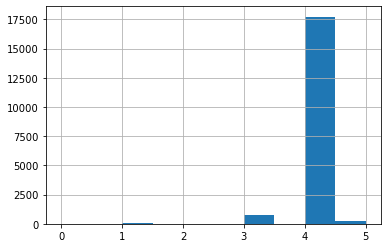

In [37]:
df["time_signature"].hist()

In [45]:
df=df[(df["time_signature"]>2) & (df["time_signature"]<4.5)]

<AxesSubplot:>

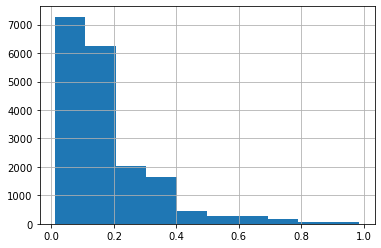

In [47]:
df["liveness"].hist()

<AxesSubplot:>

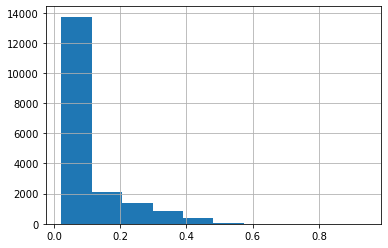

In [49]:
df["speechiness"].hist()

In [50]:
df=df[df["speechiness"]<6]

<AxesSubplot:>

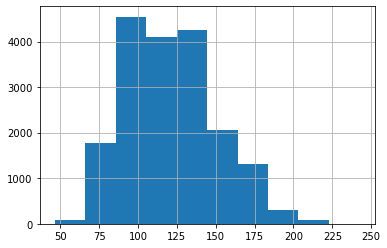

In [52]:
df["tempo"].hist()

<AxesSubplot:>

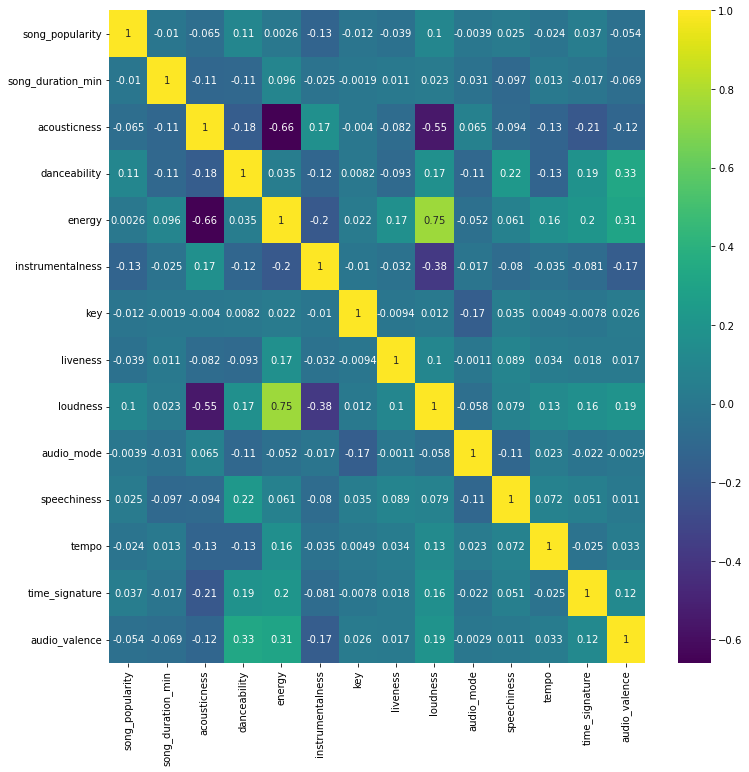

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [58]:
x=df.drop("song_popularity",axis=1)
y=df["song_popularity"]

In [59]:
etc=ExtraTreesClassifier()

In [60]:
etc.fit(x,y)
importance=etc.feature_importances_

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

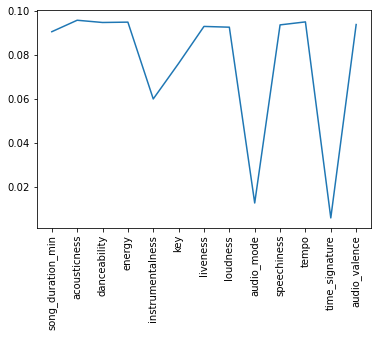

In [70]:
sns.lineplot(x=x.columns,y=importance)
plt.xticks(rotation=90)

In [71]:
x=x.drop(["instrumentalness","audio_mode","time_signature"],axis=1)

In [72]:
mms=MinMaxScaler()
x=mms.fit_transform(x)

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3)

In [93]:
callback=EarlyStopping(patience=2)

model=Sequential()

model.add(Dense(512,activation="relu"))

model.add(Dense(128,activation="relu"))

model.add(Dense(256,activation="relu"))

model.add(Dense(128,activation="relu"))

model.add(Dense(256,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", metrics=["accuracy"], loss="mse")

model.fit(xtrain,ytrain, callbacks=[callback],epochs=4000)

Epoch 1/4000
405/405 [==============================] - 2s 4ms/step - loss: 589.4845 - accuracy: 0.0050
Epoch 2/4000
405/405 [==============================] - 2s 5ms/step - loss: 468.0915 - accuracy: 0.0052
Epoch 3/4000
405/405 [==============================] - 2s 4ms/step - loss: 466.6588 - accuracy: 0.0052
Epoch 4/4000
405/405 [==============================] - 2s 5ms/step - loss: 458.7533 - accuracy: 0.0052
Epoch 5/4000
405/405 [==============================] - 2s 5ms/step - loss: 463.9105 - accuracy: 0.0052
Epoch 6/4000
405/405 [==============================] - 2s 5ms/step - loss: 461.5391 - accuracy: 0.0052: 0s - loss: 463.9
Epoch 7/4000
405/405 [==============================] - 2s 4ms/step - loss: 458.0989 - accuracy: 0.0052
Epoch 8/4000
405/405 [==============================] - 2s 5ms/step - loss: 456.9065 - accuracy: 0.0052
Epoch 9/4000
405/405 [==============================] - 2s 5ms/step - loss: 455.5272 - accuracy: 0.0052
Epoch 10/4000
405/405 [=======================

KeyboardInterrupt: 

In [90]:
res=pd.DataFrame(model.history.history)

<AxesSubplot:>

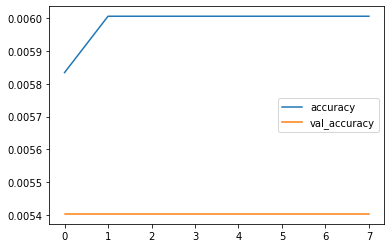

In [91]:
res[["accuracy","val_accuracy"]].plot()